<a href="https://colab.research.google.com/github/sam2005-max/my_vivino/blob/main/my_vivino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#link for blog post -> https://medium.com/p/4d00ce26142b/edit
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from sklearn.svm import LinearSVR
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
def load_dataset():
  return pd.read_csv("/content/sample_data/vivino_top_ten (5).csv")	
data = load_dataset()
data.head(10)

,Winery,Year,Wine_ID,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style,Country_Code
0,Baron de Ley,2020,8729994,Rosado de Lágrima 2020,4.2,42,7.15,La Rioja,Malbec,False,Argentina,Rose,ARG
1,New Age,N.V.,7704484,Sweet White N.V.,3.9,5672,7.43,Mendoza,Malbec,False,Argentina,White,ARG
2,Alamos,2018,68764,Malbec Rosé 2018,3.9,384,8.00,Valle de Uco,Malbec,False,Argentina,Rose,ARG
3,Alamos,2019,2166,Torrontes 2019,3.8,820,8.00,Salta,Malbec,False,Argentina,White,ARG
4,Alamos,2020,1387085,Cabernet Sauvignon 2020,3.6,489,8.00,Mendoza,Malbec,False,Argentina,Red,ARG
5,Alamos,2020,69694,Chardonnay 2020,3.7,851,8.00,Mendoza,Malbec,False,Argentina,White,ARG
6,Alamos,2020,1879,Malbec 2020,3.8,3153,8.00,Mendoza,Malbec,False,Argentina,Red,ARG
7,Amalaya,2020,1177446,Blanco (Torrontés - Riesling) 2020,3.8,501,8.50,Salta,Malbec,False,Argentina,White,ARG
8,Alamos,2019,2162,Bonarda 2019,3.8,1147,8.54,Mendoza,Malbec,False,Argentina,Red,ARG
9,Bodega Piedra Negra,2019,1233100,Alta Colección Pinot Gris 2019,3.6,149,8.90,Valle de Uco,Malbec,False,Argentina,White,ARG


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Winery         12205 non-null  object 
 1   Year           12190 non-null  object 
 2   Wine_ID        12205 non-null  int64  
 3   Wine           12205 non-null  object 
 4   Rating         12205 non-null  float64
 5   Reviews        12205 non-null  int64  
 6   Price          12205 non-null  float64
 7   Region         12205 non-null  object 
 8   Primary_Grape  12205 non-null  object 
 9   Natural        12205 non-null  bool   
 10  Country        12205 non-null  object 
 11  Style          12205 non-null  object 
 12  Country_Code   12205 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 1.1+ MB


In [ ]:
def clean_dataset(data):
    data['Year'] = data['Year'].str.replace('N.V.','2021')
    data.dropna(inplace=True)
    data['Year'] = data['Year'].astype(int)
    # data['Natural'] = data['Natural'].replace({True: 1, False: 0})
clean_dataset(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
print('Categorical columns: ')
for col in data.columns:
    if data[col].dtype == 'object':
        print(str(col))
        label = preprocessing.LabelEncoder()
        label = label.fit(data[col])
        data[col] = label.transform(data[col].astype(str))

Categorical columns: 
Winery
Wine
Region
Primary_Grape
Country
Style
Country_Code


In [ ]:
data = (data-data.mean())/data.std()
data.head()

,Winery,Year,Wine_ID,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style,Country_Code
0,-1.550101,0.663566,3.193634,0.866952,0.868028,-0.194494,-0.305223,-0.253185,-0.976488,-0.20333,-2.299776,0.025690,-2.36311
1,0.583707,0.869868,2.697933,1.187598,-0.062138,2.250122,-0.302814,-0.031809,-0.976488,-0.20333,-2.299776,1.411344,-2.36311
2,-1.748017,0.250963,-0.992947,0.090776,-0.062138,-0.045993,-0.297911,1.250504,-0.976488,-0.20333,-2.299776,0.025690,-2.36311
3,-1.748017,0.457265,-1.025138,1.356629,-0.372194,0.143324,-0.297911,0.803574,-0.976488,-0.20333,-2.299776,1.411344,-2.36311
4,-1.748017,0.663566,-0.355709,-1.235859,-0.992304,-0.000401,-0.297911,-0.031809,-0.976488,-0.20333,-2.299776,-0.667138,-2.36311


In [ ]:
def compute_correlations_matrix(dataset):
  correlations = dataset.corr()
  res = correlations["Price"].abs().sort_values(ascending=False)
  print(res)
  x = np.median(res)
  print(f"median is {x} ")
compute_correlations_matrix(data)

Price            1.000000
Rating           0.404343
Year             0.302776
Primary_Grape    0.104376
Wine_ID          0.096097
Style            0.088849
Country_Code     0.049908
Country          0.037443
Region           0.023992
Natural          0.012216
Reviews          0.004946
Winery           0.003153
Wine             0.002093
Name: Price, dtype: float64
median is 0.04990817833461415 


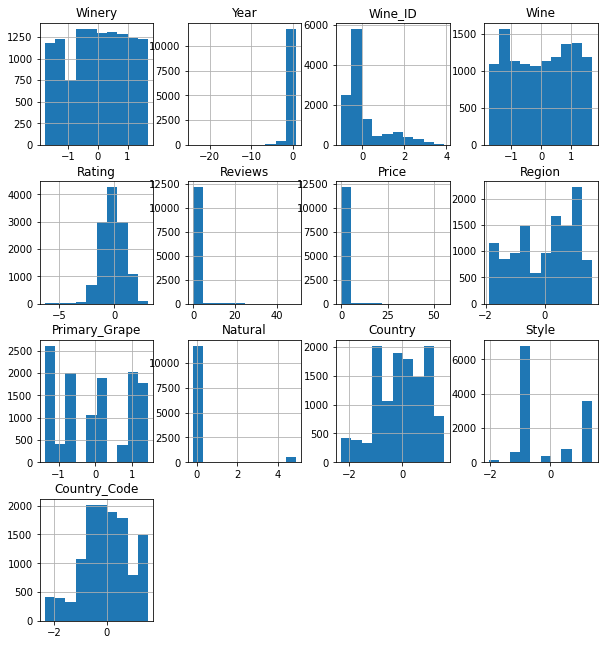

In [ ]:
def print_histograms(data):
  data.hist(bins=10,figsize=(15,11))
print_histograms(data)

In [ ]:
data.head(10)

,Winery,Year,Wine_ID,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style,Country_Code
0,-1.550101,0.663566,3.193634,0.866952,0.868028,-0.194494,-0.305223,-0.253185,-0.976488,-0.20333,-2.299776,0.025690,-2.36311
1,0.583707,0.869868,2.697933,1.187598,-0.062138,2.250122,-0.302814,-0.031809,-0.976488,-0.20333,-2.299776,1.411344,-2.36311
2,-1.748017,0.250963,-0.992947,0.090776,-0.062138,-0.045993,-0.297911,1.250504,-0.976488,-0.20333,-2.299776,0.025690,-2.36311
3,-1.748017,0.457265,-1.025138,1.356629,-0.372194,0.143324,-0.297911,0.803574,-0.976488,-0.20333,-2.299776,1.411344,-2.36311
4,-1.748017,0.663566,-0.355709,-1.235859,-0.992304,-0.000401,-0.297911,-0.031809,-0.976488,-0.20333,-2.299776,-0.667138,-2.36311
5,-1.748017,0.663566,-0.992497,-1.099610,-0.682249,0.156784,-0.297911,-0.031809,-0.976488,-0.20333,-2.299776,1.411344,-2.36311
6,-1.748017,0.663566,-1.025277,0.086679,-0.372194,1.156341,-0.297911,-0.031809,-0.976488,-0.20333,-2.299776,-0.667138,-2.36311
7,-1.684500,0.663566,-0.457043,-1.370060,-0.372194,0.004810,-0.293609,0.803574,-0.976488,-0.20333,-2.299776,1.411344,-2.36311
8,-1.748017,0.457265,-1.025140,-1.342059,-0.372194,0.285311,-0.293265,-0.031809,-0.976488,-0.20333,-2.299776,-0.667138,-2.36311
9,-1.457127,0.457265,-0.430141,-1.622069,-0.992304,-0.148033,-0.290168,1.250504,-0.976488,-0.20333,-2.299776,1.411344,-2.36311


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12190 entries, 0 to 12204
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Winery         12190 non-null  float64
 1   Year           12190 non-null  float64
 2   Wine_ID        12190 non-null  float64
 3   Wine           12190 non-null  float64
 4   Rating         12190 non-null  float64
 5   Reviews        12190 non-null  float64
 6   Price          12190 non-null  float64
 7   Region         12190 non-null  float64
 8   Primary_Grape  12190 non-null  float64
 9   Natural        12190 non-null  float64
 10  Country        12190 non-null  float64
 11  Style          12190 non-null  float64
 12  Country_Code   12190 non-null  float64
dtypes: float64(13)
memory usage: 1.3 MB


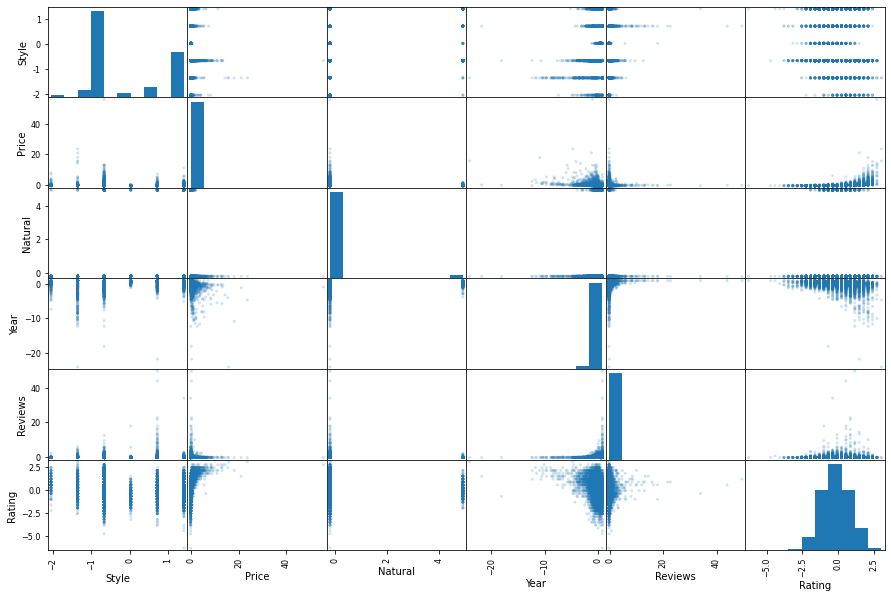

In [ ]:
def print_scatter_matrix(data):
  df = data[['Style','Price','Natural','Year','Reviews','Rating']]
  pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(15,10))
print_scatter_matrix(data) 

In [63]:
def vivino_fit_model_prediction(data):
    X = data[['Rating', 'Year','Style', 'Wine','Natural', 'Region', 'Country']]
    y = data['Price']
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 16)
    # model = KNeighborsRegressor()
    # model = LinearRegression()
    # model = LinearSVR()
    model = LGBMRegressor(n_estimators=1000)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"Model accuracy: {round(r2_score(y_test,y_pred)*100)}%")
vivino_fit_model_prediction(data)

Model accuracy: 57%
